In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

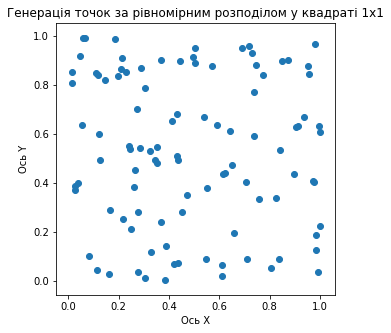

In [2]:
# Генерація N точок за рівномірним розподілом

def generate_uniform_points(N):
    points = np.random.uniform(0, 1, size=(N, 2))
    return points

points = generate_uniform_points(100)
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)
plt.scatter(points[:, 0], points[:, 1])
plt.title('Генерація точок за рівномірним розподілом у квадраті 1x1')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.show()

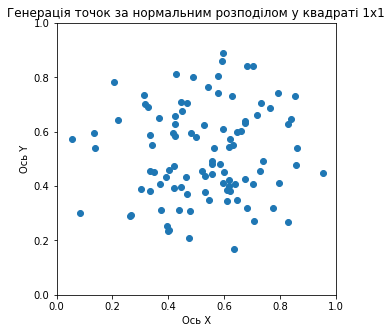

In [3]:
def generate_normal_points(N):
    points = np.random.multivariate_normal([0.5, 0.5], [[0.03, 0], [0, 0.03]], N)
    return points


# Генерація точок
points = generate_normal_points(100)
# Візуалізація точок
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)
plt.scatter(points[:, 0], points[:, 1])
plt.title('Генерація точок за нормальним розподілом у квадраті 1x1')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()


Точки опуклої оболонки:
 [[0.80481034 0.98927766]
 [0.11670516 0.94113833]
 [0.00507396 0.79197434]
 [0.00429986 0.05447427]
 [0.28128644 0.01903915]
 [0.80402609 0.00244028]
 [0.98784906 0.01567105]
 [0.99564122 0.1388444 ]
 [0.9952904  0.18917073]
 [0.97437386 0.74557988]
 [0.9404415  0.97046132]]


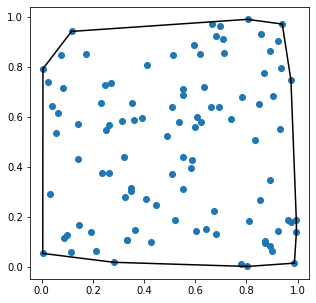

In [4]:
N = 100
points = generate_uniform_points(N)
hull = ConvexHull(points)
convex_hull_points = points[hull.vertices]
print('Точки опуклої оболонки:\n', convex_hull_points)

# Виведення точок та опуклої лінійної оболонки
def plt_hull():
    plt.plot(points[:, 0], points[:, 1], 'o')
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
        #plt.title('Опукла лінійна оболонка')

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)        
plt_hull()    
plt.show()

In [5]:
# Обчислення відстані між двома точками

def distance(point1, point2):
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**0.5

def find_farthest_points(points):
    farthest_distance = 0
    farthest_points = (None, None)

    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            current_distance = distance(points[i], points[j])

            if current_distance > farthest_distance:
                farthest_distance = current_distance
                farthest_points = (points[i], points[j])

    return farthest_points

most_distant_points = find_farthest_points(convex_hull_points)

print('Найбільш віддалені точки:\n', np.array(most_distant_points))
print('Відстань між ними:', distance(most_distant_points[0], most_distant_points[1]))

Найбільш віддалені точки:
 [[0.00429986 0.05447427]
 [0.9404415  0.97046132]]
Відстань між ними: 1.3097302845039351


In [6]:
#plt.scatter([most_distant_points[0][0], most_distant_points[1][0]], [most_distant_points[0][1], most_distant_points[1][1]], c='red', s=100, marker='x')

In [7]:
# Додавання перпендикулярів

def plot_perpendiculars(points, line_point1, line_point2):
    left_points = []
    left_dist = []
    right_points = []
    right_dist = []
    for point in points:
        k1 = (line_point2[1]-line_point1[1])/(line_point2[0]-line_point1[0])
        k2 = (line_point1[0]-line_point2[0])/(line_point2[1]-line_point1[1])
        b1 = line_point1[1] - (line_point2[1]-line_point1[1])/(line_point2[0]-line_point1[0])*line_point1[0]
        b2 = point[1] - (line_point1[0]-line_point2[0])/(line_point2[1]-line_point1[1])*point[0]
        
        x = (b2-b1)/(k1-k2)
        y = k1*x+b1
        perpendicular = x, y
        #print(point[0],point[1], perpendicular)
        if point[1] > perpendicular[1]:
            left_points.append([point[0],point[1],x,y])
            left_dist.append(distance(point, perpendicular))
        elif point[1] < perpendicular[1]:
            right_points.append([point[0],point[1],x,y])
            right_dist.append(distance(point, perpendicular))
     
    max_left_dist = max(left_dist)
    max_left_index = left_dist.index(max_left_dist)
    max_right_dist = max(right_dist)
    max_right_index = right_dist.index(max_right_dist)
    
    
    plt.plot([left_points[max_left_index][0], left_points[max_left_index][2]], [left_points[max_left_index][1], left_points[max_left_index][3]], 'r--')
    plt.plot([right_points[max_right_index][0], right_points[max_right_index][2]], [right_points[max_right_index][1], right_points[max_right_index][3]], 'r--')
    #print(max_left_dist,max_right_dist)
    
    return [left_points[max_left_index][0], left_points[max_left_index][1]], [right_points[max_right_index][0], right_points[max_right_index][1]], max_left_dist, max_right_dist

def parallel_line_through_point(point1, point2, third_point):
    # Знаходимо коефіцієнт наклона оригінальної прямої
    original_slope = (point2[1] - point1[1]) / (point2[0] - point1[0])

    # Знаходимо точку на оригінальній прямій, через яку пролягатиме паралельна пряма
    original_line_intercept = point1[1] - original_slope * point1[0]

    # Знаходимо рівняння паралельної прямої
    parallel_slope = original_slope
    parallel_intercept = third_point[1] - parallel_slope * third_point[0]

    return parallel_slope, parallel_intercept    


In [8]:
def projection_on_line(points, line_point1, line_point2):
    list_on_x = []
    list_dist = []
    projections = []
    for point in points:
        k1 = (line_point2[1]-line_point1[1])/(line_point2[0]-line_point1[0])
        k2 = (line_point1[0]-line_point2[0])/(line_point2[1]-line_point1[1])
        b1 = line_point1[1] - (line_point2[1]-line_point1[1])/(line_point2[0]-line_point1[0])*line_point1[0]
        b2 = point[1] - (line_point1[0]-line_point2[0])/(line_point2[1]-line_point1[1])*point[0]
        
        x = (b2-b1)/(k1-k2)
        y = k1*x+b1
        
        perpendicular = [x, y]
        projections.append(perpendicular)
        list_on_x.append(x)
        list_dist.append(distance(point, perpendicular))
        
    max_list_on_x = max(list_on_x)
    max_list_on_x_index = list_on_x.index(max_list_on_x)
    min_list_on_x = min(list_on_x)
    min_list_on_x_index = list_on_x.index(min_list_on_x)
    max_list_dist = max(list_dist)
    max_list_dist_index = list_dist.index(max_list_dist)
        
    # ліва точка та її проекція, права точка та її проекція, найвіддаленіша точка від прямої, її проекція, довжина проекції 
    return points[max_list_on_x_index], projections[max_list_on_x_index], points[min_list_on_x_index], projections[min_list_on_x_index], points[max_list_dist_index], projections[max_list_dist_index], list_dist[max_list_dist_index] 

In [9]:
convex_hull_points_for_cycle = np.vstack((convex_hull_points, convex_hull_points[0]))
S_min_rectangle = []

for i in range(convex_hull_points_for_cycle.shape[0]-1):
    max_p, max_pr, min_p, min_pr, dist_p, dist_pr, max_dist = projection_on_line(convex_hull_points_for_cycle, convex_hull_points_for_cycle[i], convex_hull_points_for_cycle[i+1])
    S_min_rectangle.append(distance(max_pr, min_pr) * distance(dist_p, dist_pr))
    
min_S_min_rectangle = min(S_min_rectangle)
S_min_rectangle_index = S_min_rectangle.index(min_S_min_rectangle)


In [10]:
def line_through_two_points(point1, point2):
    slope = (point2[1] - point1[1]) / (point2[0] - point1[0])
    intercept = point1[1] - slope * point1[0]
    
    x_values = np.linspace(-8, 8, 100)
    y_values = slope * x_values + intercept
    
    return x_values, y_values

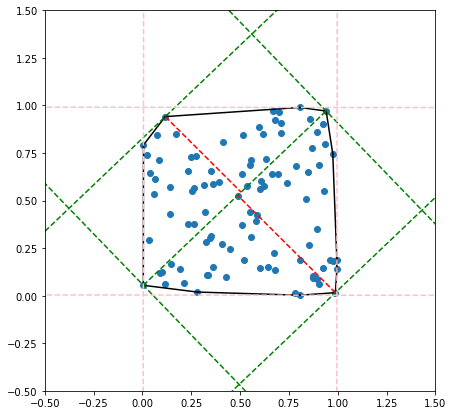

S Петуніна =  1.6643249715022348
S мінімального прямокутника =  0.9782050465523607


In [11]:
# Малювання опуклої оболонки та перпендикулярів
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(7)
plt_hull()
plt.plot([most_distant_points[0][0], most_distant_points[1][0]], [most_distant_points[0][1], most_distant_points[1][1]], c='green', linestyle='dashed')
p1, p2, l1, l2 = plot_perpendiculars(convex_hull_points, most_distant_points[0], most_distant_points[1])

# Обчислюємо рівняння паралельної прямої для S_Петуніна
parallel_slope, parallel_intercept = parallel_line_through_point(p1, p2, most_distant_points[0])
x_values = np.linspace(-8, 8, 100)
parallel_line = parallel_slope * x_values + parallel_intercept
plt.plot(x_values, parallel_line, color='green', linestyle='--')

parallel_slope, parallel_intercept = parallel_line_through_point(p1, p2, most_distant_points[1])
x_values = np.linspace(-8, 8, 100)
parallel_line = parallel_slope * x_values + parallel_intercept
plt.plot(x_values, parallel_line, color='green', linestyle='--')

parallel_slope, parallel_intercept = parallel_line_through_point(most_distant_points[0], most_distant_points[1], p1)
x_values = np.linspace(-8, 8, 100)
parallel_line = parallel_slope * x_values + parallel_intercept
plt.plot(x_values, parallel_line, color='green', linestyle='--')

parallel_slope, parallel_intercept = parallel_line_through_point(most_distant_points[0], most_distant_points[1], p2)
x_values = np.linspace(-8, 8, 100)
parallel_line = parallel_slope * x_values + parallel_intercept
plt.plot(x_values, parallel_line, color='green', linestyle='--')

#Малювання мінімльного прямокутника
p1_on_line, p2_on_line = convex_hull_points_for_cycle[S_min_rectangle_index], convex_hull_points_for_cycle[S_min_rectangle_index+1]
max_p, max_pr, min_p, min_pr, dist_p, dist_pr, max_dist = projection_on_line(convex_hull_points_for_cycle, p1_on_line, p2_on_line)


parallel_slope, parallel_intercept = parallel_line_through_point(convex_hull_points_for_cycle[S_min_rectangle_index], convex_hull_points_for_cycle[S_min_rectangle_index+1], dist_p)
x_values = np.linspace(-8, 8, 100)
parallel_line = parallel_slope * x_values + parallel_intercept
plt.plot(x_values, parallel_line, color='pink', linestyle='--')

parallel_slope, parallel_intercept = parallel_line_through_point(max_p, max_pr, min_p)
x_values = np.linspace(-8, 8, 100)
parallel_line = parallel_slope * x_values + parallel_intercept
plt.plot(x_values, parallel_line, color='pink', linestyle='--')

parallel_slope, parallel_intercept = parallel_line_through_point(min_p, min_pr, max_p)
x_values = np.linspace(-8, 8, 100)
parallel_line = parallel_slope * x_values + parallel_intercept
plt.plot(x_values, parallel_line, color='pink', linestyle='--')

plt.plot(line_through_two_points(p1_on_line, p2_on_line)[0], line_through_two_points(p1_on_line, p2_on_line)[1], color='pink', linestyle='--')

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

S_Petunin = distance(most_distant_points[0], most_distant_points[1]) * (l1+l2)
print('S Петуніна = ',S_Petunin)
print('S мінімального прямокутника = ', min_S_min_rectangle)

In [12]:
def do_perpendiculars(points, line_point1, line_point2):
    left_points = []
    left_dist = []
    right_points = []
    right_dist = []
    for point in points:
        k1 = (line_point2[1]-line_point1[1])/(line_point2[0]-line_point1[0])
        k2 = (line_point1[0]-line_point2[0])/(line_point2[1]-line_point1[1])
        b1 = line_point1[1] - (line_point2[1]-line_point1[1])/(line_point2[0]-line_point1[0])*line_point1[0]
        b2 = point[1] - (line_point1[0]-line_point2[0])/(line_point2[1]-line_point1[1])*point[0]
        
        x = (b2-b1)/(k1-k2)
        y = k1*x+b1
        perpendicular = x, y
        #print(point[0],point[1], perpendicular)
        if point[1] > perpendicular[1]:
            left_points.append([point[0],point[1],x,y])
            left_dist.append(distance(point, perpendicular))
        elif point[1] < perpendicular[1]:
            right_points.append([point[0],point[1],x,y])
            right_dist.append(distance(point, perpendicular))
            
    if left_dist == []:
        max_left_dist = 0
        max_right_dist = max(right_dist)
        max_right_index = right_dist.index(max_right_dist)
    elif right_dist == []:
        max_right_dist = 0
        max_left_dist = max(left_dist)
        max_left_index = left_dist.index(max_left_dist)
    else:    
        max_left_dist = max(left_dist)
        max_left_index = left_dist.index(max_left_dist)
        max_right_dist = max(right_dist)
        max_right_index = right_dist.index(max_right_dist)
    
    p_dist = max_left_dist + max_right_dist
    return p_dist

In [13]:
print('Середня площа для прямокутника Петуніна для 100 разів згенерованих рівномірно розподілених N точок:')

for N in [10, 100, 1000, 1000000]:
    S = 0
    for k in range(100):
        points = generate_uniform_points(N)
        hull = ConvexHull(points)
        convex_hull_points = points[hull.vertices]
        
        most_distant_points = find_farthest_points(convex_hull_points)
        
        p_dist = do_perpendiculars(convex_hull_points, most_distant_points[0], most_distant_points[1])
        S += distance(most_distant_points[0], most_distant_points[1]) * p_dist
    S /= 100
    print(f'Для N = {N}: S = {S}')
        


Середня площа для прямокутника Петуніна для 100 разів згенерованих рівномірно розподілених N точок:
Для N = 10: S = 0.7527814588196164
Для N = 100: S = 1.5420959095539901
Для N = 1000: S = 1.8481625092700675
Для N = 1000000: S = 1.9949157523741752


In [14]:
print('Середня площа для прямокутника Петуніна для 100 разів згенерованих нормально розподілених N точок:')

for N in [10, 100, 1000, 1000000]:
    S = 0
    for k in range(100):
        points = generate_normal_points(N)
        hull = ConvexHull(points)
        convex_hull_points = points[hull.vertices]
        
        most_distant_points = find_farthest_points(convex_hull_points)
        
        p_dist = do_perpendiculars(convex_hull_points, most_distant_points[0], most_distant_points[1])
        S += distance(most_distant_points[0], most_distant_points[1]) * p_dist
    S /= 100
    print(f'Для N = {N}: S = {S}')

Середня площа для прямокутника Петуніна для 100 разів згенерованих нормально розподілених N точок:
Для N = 10: S = 0.29331391383099875
Для N = 100: S = 0.8211420495710829
Для N = 1000: S = 1.3452895206784277
Для N = 1000000: S = 2.9324985770835337


In [15]:
print('Середня площа для мінімального прямокутника для 100 разів згенерованих рівномірно розподілених N точок:')

for N in [10, 100, 1000, 1000000]:
    S = 0
    for k in range(100):
        points = generate_uniform_points(N)
        hull = ConvexHull(points)
        convex_hull_points = points[hull.vertices]
        convex_hull_points_for_cycle = np.vstack((convex_hull_points, convex_hull_points[0]))
        S_min_rectangle = []
        for i in range(convex_hull_points_for_cycle.shape[0]-1):
            max_p, max_pr, min_p, min_pr, dist_p, dist_pr, max_dist = projection_on_line(convex_hull_points_for_cycle, convex_hull_points_for_cycle[i], convex_hull_points_for_cycle[i+1])
            S_min_rectangle.append(distance(max_pr, min_pr) * distance(dist_p, dist_pr))
        S += min(S_min_rectangle)
    S /= 100
    
    print(f'Для N = {N}: S = {S}')

Середня площа для мінімального прямокутника для 100 разів згенерованих рівномірно розподілених N точок:
Для N = 10: S = 0.5960845473532209
Для N = 100: S = 0.9548104431618714
Для N = 1000: S = 0.9952561057907557
Для N = 1000000: S = 0.9999953870309636


In [16]:
print('Середня площа для мінімального прямокутника для 100 разів згенерованих нормально розподілених N точок:')

for N in [10, 100, 1000, 1000000]:
    S = 0
    for k in range(100):
        points = generate_uniform_points(N)
        hull = ConvexHull(points)
        convex_hull_points = points[hull.vertices]
        convex_hull_points_for_cycle = np.vstack((convex_hull_points, convex_hull_points[0]))
        S_min_rectangle = []
        for i in range(convex_hull_points_for_cycle.shape[0]-1):
            max_p, max_pr, min_p, min_pr, dist_p, dist_pr, max_dist = projection_on_line(convex_hull_points_for_cycle, convex_hull_points_for_cycle[i], convex_hull_points_for_cycle[i+1])
            S_min_rectangle.append(distance(max_pr, min_pr) * distance(dist_p, dist_pr))
        S += min(S_min_rectangle)
    S /= 100
    
    print(f'Для N = {N}: S = {S}')

Середня площа для мінімального прямокутника для 100 разів згенерованих нормально розподілених N точок:
Для N = 10: S = 0.6126286381917817
Для N = 100: S = 0.9523233424193275
Для N = 1000: S = 0.9955806546021988
Для N = 1000000: S = 0.9999953408454308
